In [8]:
import pandas as pd
import numpy as np
from scipy.stats import chi2_contingency
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [9]:
data = pd.read_csv('lm_data.csv')

# 1 Categorical Variables

Feature: gender
Lower CI: 7.8081745963202e-06; Upper CI: 5.401820757964277
Observed Chi2: 0.5697619858858407
p-value: 0.450353512346385


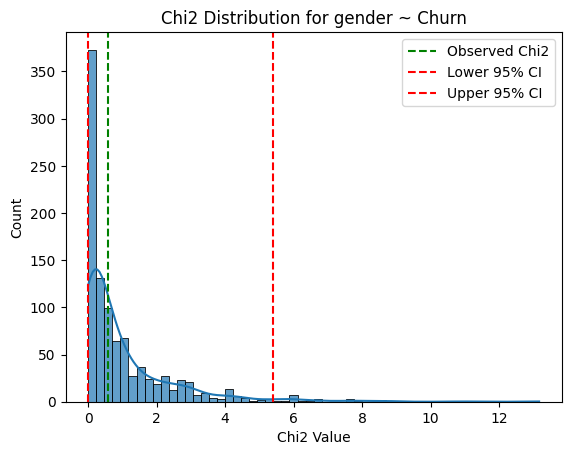

Feature: Partner
Lower CI: 2.002398858363493e-05; Upper CI: 5.196965249311337
Observed Chi2: 159.26811967875054
p-value: 1.63514998390966e-36


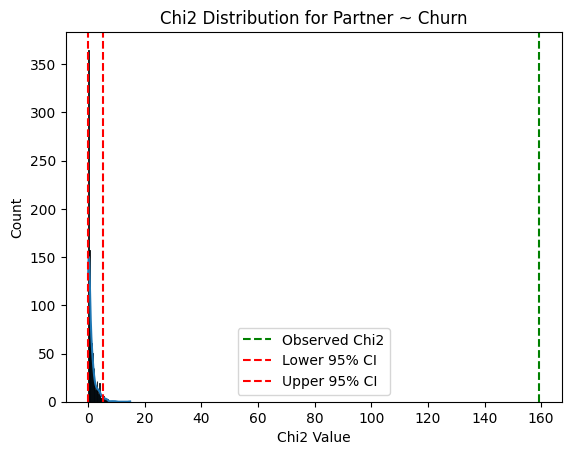

Feature: Dependents
Lower CI: 0.0; Upper CI: 4.7179232119002625
Observed Chi2: 191.48732227526375
p-value: 1.5055223510269915e-43


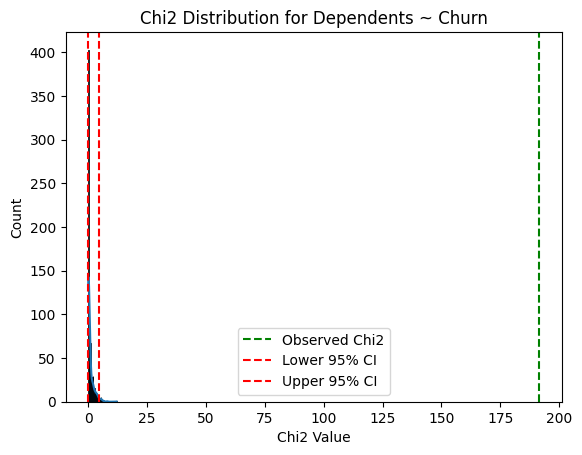

Feature: SeniorCitizen
Lower CI: 0.0; Upper CI: 5.510038804034291
Observed Chi2: 162.90004321471173
p-value: 2.6306207165410168e-37


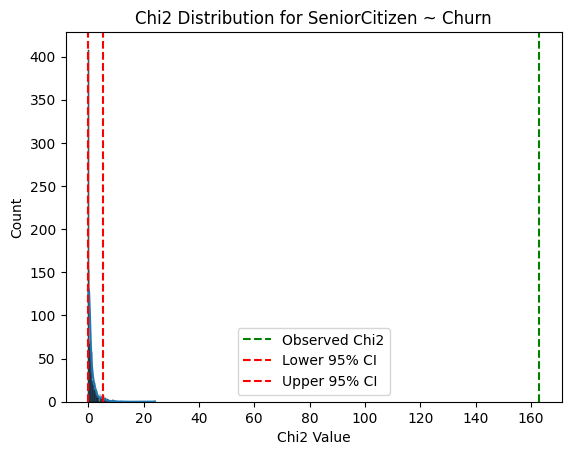

Feature: PaperlessBilling
Lower CI: 0.0; Upper CI: 4.8264067218825755
Observed Chi2: 261.87814622279217
p-value: 6.685450416128118e-59


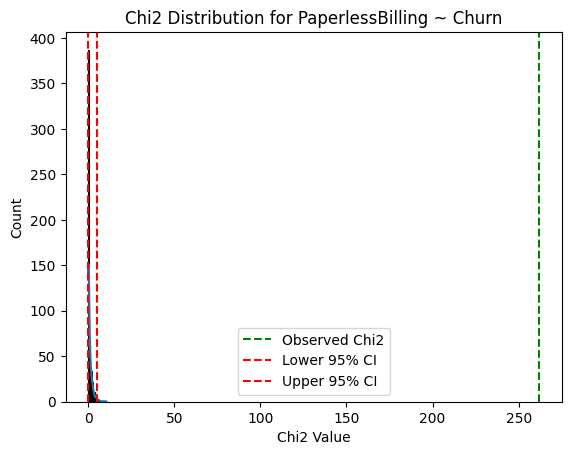

Feature: PaymentMethod
Lower CI: 0.23001876073965222; Upper CI: 8.790760321182635
Observed Chi2: 651.7189842626278
p-value: 6.175267784387533e-141


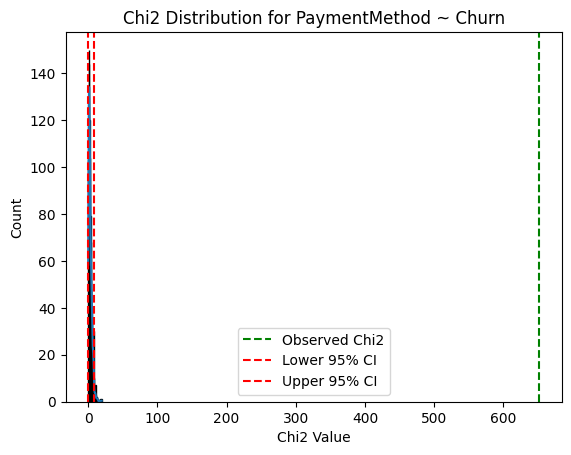

Feature: PhoneService
Lower CI: 0.0; Upper CI: 4.42220582372977
Observed Chi2: 1.0189475761956581
p-value: 0.31276877715252804


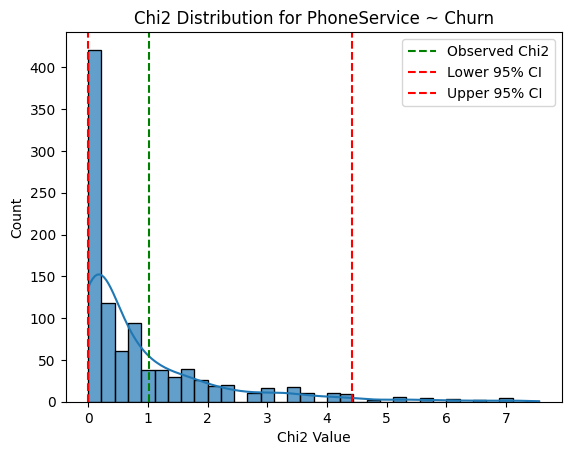

Feature: Contract
Lower CI: 0.04015302728092662; Upper CI: 7.860439032185153
Observed Chi2: 1205.4637030070103
p-value: 1.7253723132019176e-262


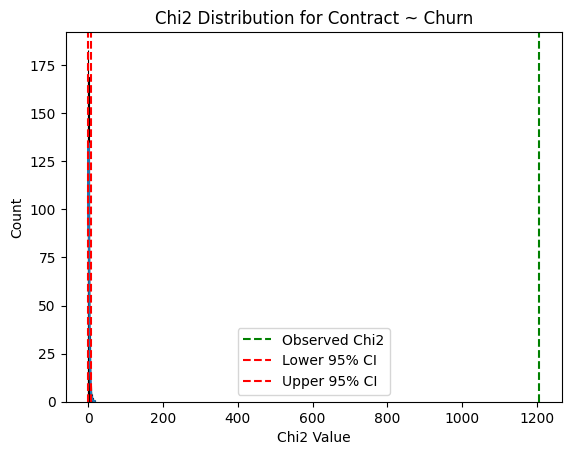

Feature: InternetService
Lower CI: 0.05445938416337688; Upper CI: 7.311199769726155
Observed Chi2: 743.4480155182436
p-value: 3.650183009453061e-162


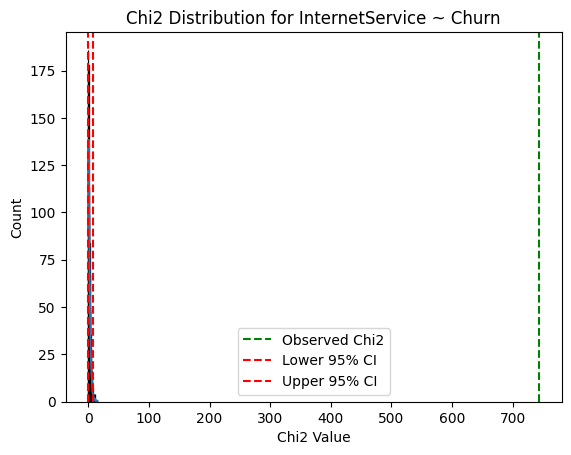

In [ ]:
cat_var_subset = data[['gender', 'Partner', 'Dependents', 'SeniorCitizen', 
                       'PaperlessBilling', 'PaymentMethod', 'PhoneService', 
                       'Contract', 'InternetService', 'Churn']].copy()

def permutation_test(data):
    np.random.seed(123)
    
    for col in data.columns:
        if col != 'Churn':

            # Calculate Chi2 for observed data
            observed_conting = pd.crosstab(data[col], data['Churn'])
            observed_chi2, observed_p, _, _ = chi2_contingency(observed_conting)

            # Save results of 1000 permutations
            results = []
            for i in range(1000):
                x_permuted = np.random.permutation(data[col].values)
                chi2_conting = pd.crosstab(x_permuted, data['Churn'])
                chi2, _, _, _ = chi2_contingency(chi2_conting)
                results.append(chi2)

            # Calculate 95% confidence interval (two-tailed)
            ci_lower, ci_upper = np.percentile(results, [2.5, 97.5])

            # Print results
            print(f"Feature: {col}")
            print(f'Lower CI: {ci_lower}; Upper CI: {ci_upper}')
            print(f'Observed Chi2: {observed_chi2}')
            print(f'p-value: {observed_p}')

            # Plot
            sns.histplot(results, kde=True, alpha=0.7)
            plt.title(f'Chi2 Distribution for {col} ~ Churn')
            plt.axvline(observed_chi2, linestyle='--', color='green', label='Observed Chi2')
            plt.axvline(ci_lower, linestyle='--', color='red', label='Lower 95% CI')
            plt.axvline(ci_upper, linestyle='--', color='red', label='Upper 95% CI')
            plt.xlabel('Chi2 Value')
            plt.legend()
            plt.show()

# Run permutation test
permutation_test(cat_var_subset)

# 2 Categorical Variables with level no internet Service

Feature: OnlineSecurity
Lower CI: 0.0007016951408838197; Upper CI: 5.101017032664871
Observed Chi2: 431.20506521074674
p-value: 8.88395906293561e-96


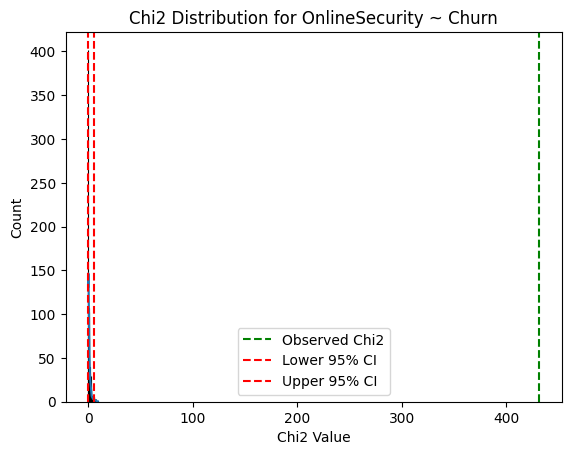

Feature: OnlineBackup
Lower CI: 0.0; Upper CI: 4.808212531831501
Observed Chi2: 208.4926503003499
p-value: 2.929087193767152e-47


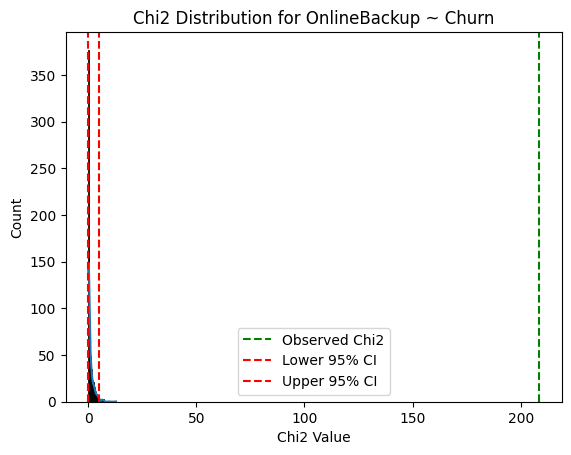

Feature: DeviceProtection
Lower CI: 0.0006113395280428914; Upper CI: 5.063936033847501
Observed Chi2: 172.97808966232878
p-value: 1.654833100795796e-39


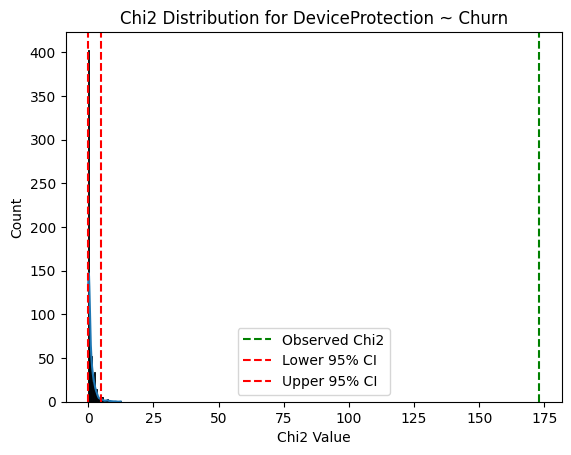

Feature: TechSupport
Lower CI: 7.638919569806377e-05; Upper CI: 4.881608772782665
Observed Chi2: 415.12034975933403
p-value: 2.8156228053243093e-92


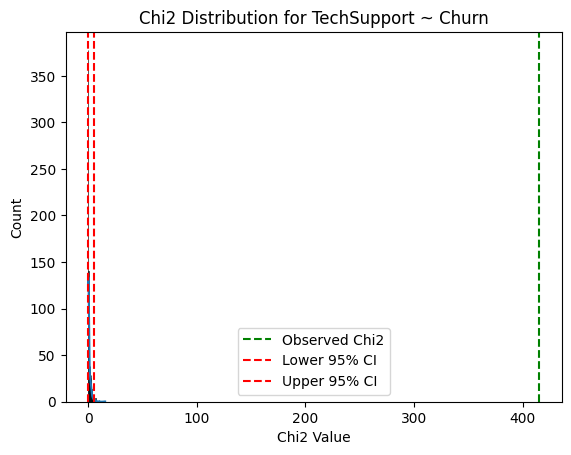

Feature: StreamingTV
Lower CI: 0.00012074336561197188; Upper CI: 4.639428339419705
Observed Chi2: 7.789820279640622
p-value: 0.005254142174852827


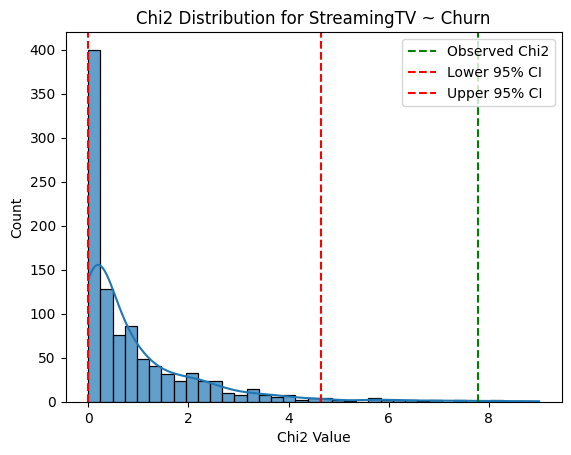

Feature: StreamingMovies
Lower CI: 0.0; Upper CI: 4.737472532738902
Observed Chi2: 8.872345397595861
p-value: 0.0028952293364705507


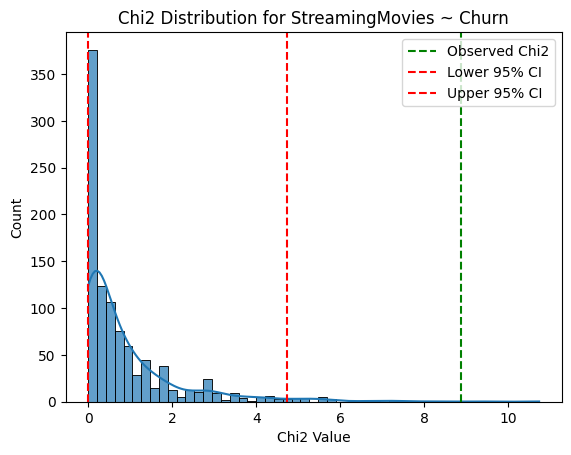

Feature: MultipleLines
Lower CI: 0.07086370737756033; Upper CI: 7.624614931428395
Observed Chi2: 19.22880221800278
p-value: 6.676035717825459e-05


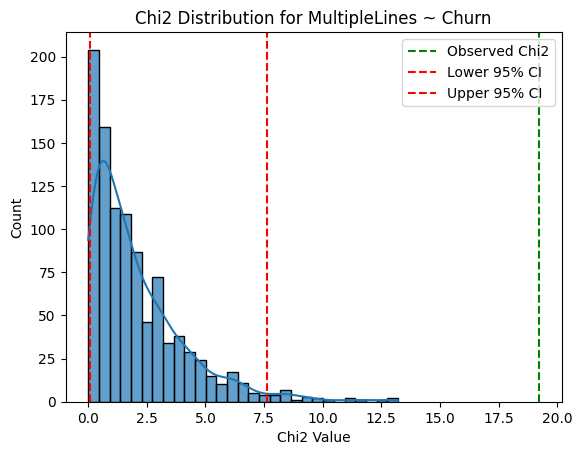

Feature: InternetService
Lower CI: 0.0; Upper CI: 4.70208996974615
Observed Chi2: 333.9349842387708
p-value: 1.3358499438127818e-74


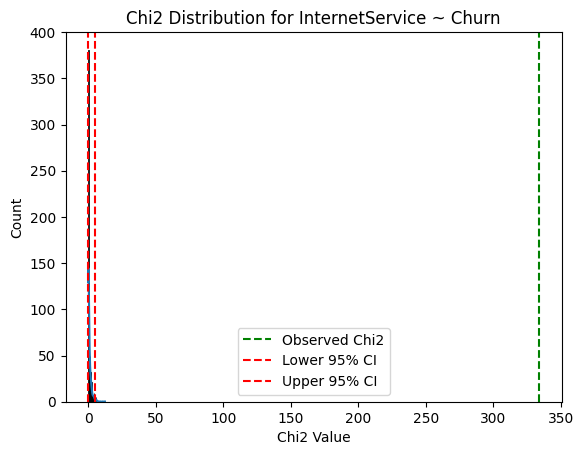

In [ ]:
cat_var__no_internet_subset = data[['OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport',
                                    'StreamingTV','StreamingMovies','MultipleLines','Churn',
                                    'InternetService']].copy()

cat_var__no_internet_subset_filter = cat_var__no_internet_subset[cat_var__no_internet_subset.InternetService != 'No']


permutation_test(cat_var__no_internet_subset_filter)